Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

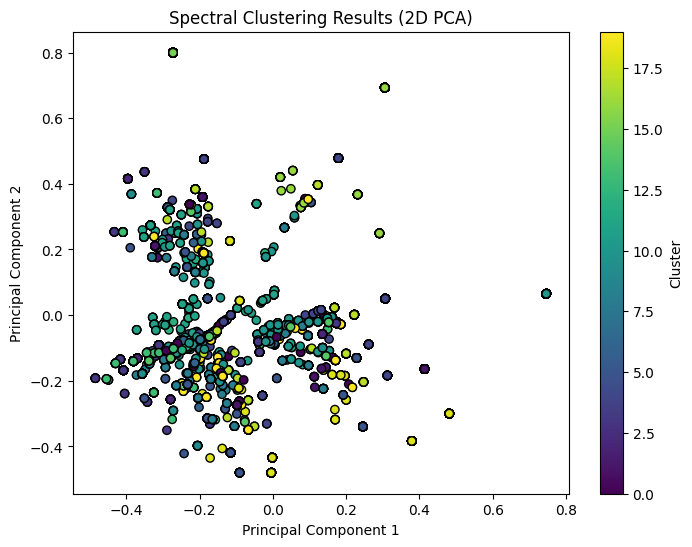

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('amazon_prime_titles.csv')

# Assuming 'listed_in' column contains genres, filling NaN values
genre_data = data['listed_in'].fillna('')

# Using TF-IDF to convert genres to numerical format
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(genre_data)

# Initialize and fit Spectral Clustering model
n_clusters = 20  # Number of clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=1.0, random_state=42)
clusters = spectral.fit_predict(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title('Spectral Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
data['Cluster'] = clusters 

cluster_groups = data.groupby('Cluster')

for cluster_label, cluster_df in cluster_groups:
    print(f"Cluster {cluster_label}:")
    for index, row in cluster_df.iterrows():
        print(f"- {row['title']} ({row['listed_in']})")
    print("\n")

for cluster_label, cluster_df in cluster_groups:
    print(f"Cluster {cluster_label}:")
    genres_concatenated = ' '.join(cluster_df['listed_in'].fillna('').tolist())
    vectorized_genres = vectorizer.transform([genres_concatenated])
    genre_frequencies = pd.DataFrame(vectorized_genres.toarray(), columns=vectorizer.get_feature_names_out())
    top_genres = genre_frequencies.sum().sort_values(ascending=False).head(5)
    print(f"Top Genres: {', '.join(top_genres.index.tolist())}\n")

Cluster 0:
- Yancy Derringer (Action, Western)
- Winds Of The Wasteland (Western)
- Wild Boys (Drama, Western)
- Wall Street Cowboy (Western)
- Under Western Stars (Western)
- Under Nevada Skies (Western)
- Timber War (Western)
- Timber Queen (Action, Drama, Western)
- Thomasine and Bushrod (Action, Romance, Western)
- The Young Land (Action, Western)
- The Woman of the Town (Western)
- The Over-The-Hill Gang Rides Again (Comedy, Western)
- The Outsider (Action, Western)
- The Man From Utah (Western)
- The Man From Cheyenne (Western)
- The Legend Of Ben Hall (Action, Western)
- The Kid's Last Ride (Action, Western)
- The Keeping Room (Action, Drama, Western)
- The Gay Ranchero (Suspense, Western)
- The Fighting Kentuckian (Action, Romance, Western)
- The Far Frontier (Western)
- The Cowboy And The Senorita (Western)
- The Capture (Western)
- Texas Rising (Drama, Western)
- Texas Legionaires (Western)
- Sunset On The Desert (Western)
- Sundown Saunders (Western)
- Strange Empire Series 

In [31]:
# Add cluster labels to the movies DataFrame
data['Cluster'] = clusters

# Count the number of movies in each cluster
cluster_counts = data['Cluster'].value_counts()

# Display the number of movies in each cluster
print("Number of movies in each cluster:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count} movies")


Number of movies in each cluster:
Cluster 10: 1392 movies
Cluster 18: 936 movies
Cluster 5: 723 movies
Cluster 1: 644 movies
Cluster 4: 585 movies
Cluster 3: 564 movies
Cluster 15: 536 movies
Cluster 16: 490 movies
Cluster 13: 487 movies
Cluster 11: 473 movies
Cluster 8: 449 movies
Cluster 2: 432 movies
Cluster 9: 397 movies
Cluster 17: 308 movies
Cluster 7: 263 movies
Cluster 19: 243 movies
Cluster 6: 218 movies
Cluster 0: 215 movies
Cluster 14: 158 movies
Cluster 12: 155 movies


The dataset contains movies from Amazon Prime. For the spectral clustering, I took note of the genres of movies to see which genres are popular for Amazon to include in their platform or produce. The cluster with the most movies/tv shows is cluster 10 with 1392 media. The primary genres in cluster 10 are drama, young, adult, and faith. Movies with such genres tend to reach out to a broader audience rather than a niche one. The cluster with the least movies has its dominant genres as concerts, videos, music, documentary, and special which does cater to a more specific audience, and may be why Amazon Prime doesn't have too many content with those genres. The genre faith might indicate religious or spiritual themes. This can indicate a lot of things. Amazon may be distributing these genres because these are the most common genres regardless of Amazon Prime's target audience. It may also be because Amazon noticed more viewership numbers in those genres which is why they commonly distribute those genres.

Further analysis can be done, ideally with movie ratings from users to identify user preference. Most datasets I found were too big and froze my computer, so I stuck with a smaller dataset. 

---

Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

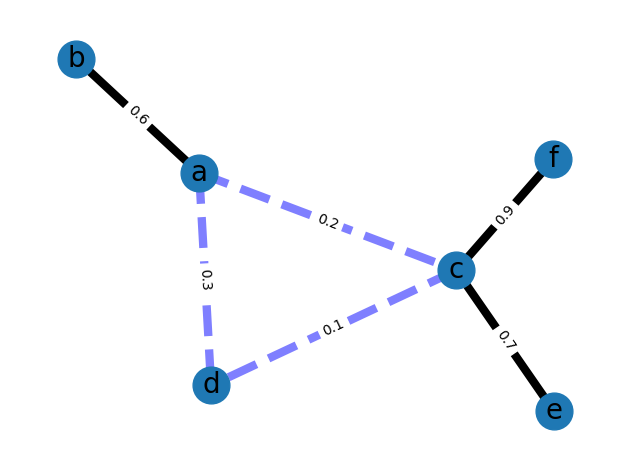

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)


eigenvector_centralities = nx.eigenvector_centrality(G)

print("Eigenvector Centrality:")
for node, centrality in eigenvector_centralities.items():
    print(f"{node}: {centrality}")


Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


---

Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590
2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf
3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).
4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Hypothesis: Users in 'letterboxd' subreddit with higher eigenvector centrality have more influence, impact, and engagement in the community.

Top 10 Users by Eigenvector Centrality:
User: Zoland2020EX, Eigenvector Centrality: 0.38094377877599067
User: Chasedabigbase, Eigenvector Centrality: 0.12244483351857782
User: Linubidix, Eigenvector Centrality: 0.10685038224882704
User: yinklestaabs, Eigenvector Centrality: 0.08655805927995054
User: Ikeatower, Eigenvector Centrality: 0.08517990532733079
User: MorrowPolo, Eigenvector Centrality: 0.08207694750545465
User: Kingatari789, Eigenvector Centrality: 0.08168800203096682
User: Dreadnought13, Eigenvector Centrality: 0.08086355800596189
User: pkfreeze175, Eigenvector Centrality: 0.07827099868858613
User: IshSmithsonian, Eigenvector Centrality: 0.07762312470926747


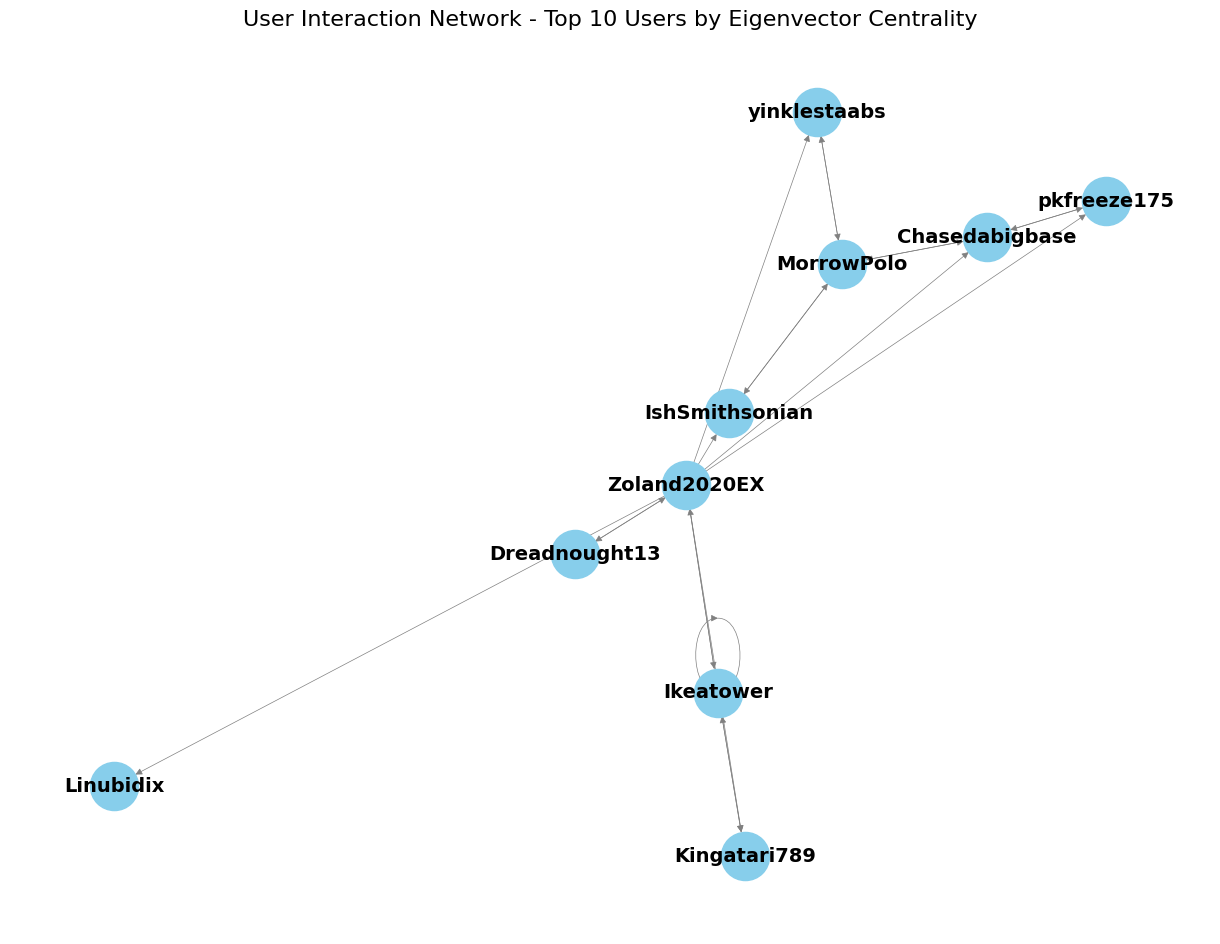

In [2]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Reddit API setup
redditApi = praw.Reddit(client_id = 'WyLWAKB8K585lQ7aOioVBQ' ,
                        client_secret = 'UrATvdWtEkukxCKFVinYQms9CgmDQw' ,
                        user_agent = 'PL_SocialMedia' )

# Subreddit selection (r/Letterboxd)
subreddit = redditApi.subreddit('letterboxd')

# Create an empty directed graph to represent the user interaction network
g = nx.DiGraph()

# Collecting data from subreddit - example: top 50 hot posts
posts = subreddit.hot(limit=50)
for post in posts:
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        if comment.author:
            parent_author = comment.parent().author
            if parent_author and comment.author:  # Check if both authors exist and are not None
                g.add_edge(parent_author, comment.author)

# Calculate eigenvector centrality
eigenvector_centralities = nx.eigenvector_centrality(g)

# Find nodes (users) with highest eigenvector centrality
top_users_eigenvector = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Users by Eigenvector Centrality:")
for user, centrality in top_users_eigenvector:
    print(f"User: {user}, Eigenvector Centrality: {centrality}")

# Create a subgraph containing the top 10 users based on eigenvector centrality
top_users = [user for user, _ in top_users_eigenvector]
subgraph = g.subgraph(top_users)

# Visualize the subgraph
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(subgraph, seed=42)  # Use seed for reproducibility
nx.draw(subgraph, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=14, font_weight='bold', edge_color='gray', width=0.5, arrowsize=10)
plt.title('User Interaction Network - Top 10 Users by Eigenvector Centrality', fontsize=16)
#plt.tight_layout()
plt.show()


Zoland2020EX is the user with the highest eigenvector centrality which may indicate that the user is very involved in the subreddit, interacting with other users whether it be through posting, or commenting. However, it must be noted that this only involves the top 50 hot posts which means the user Zoland2020EX may not be the user with the highest eigenvector centrality. To confirm if Zoland has made a lot of engagement in the subreddit, a quick search on the profile was made, and it was shown that the user had created a post that received a lot of upvotes, and comments. The user also made numerous replies to other posts. It seems that for the current month/period, the user is the most engaged in a lot of popular threads, or posts, and initiates/creates them as well.